In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 22.07 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
cd stylegan2-ada-pytorch/

/content/stylegan2-ada-pytorch


In [3]:
!wget "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"

--2023-08-11 03:07:32--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 65.9.86.106, 65.9.86.78, 65.9.86.103, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|65.9.86.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  38.6MB/s    in 9.2s    

2023-08-11 03:07:42 (39.5 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [4]:
!pip install ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 3.3 MB/s eta 0:00:00


In [5]:
import sys
import torch
import pickle
import torchvision
import matplotlib.pyplot as plt

In [6]:

with open('ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module



Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


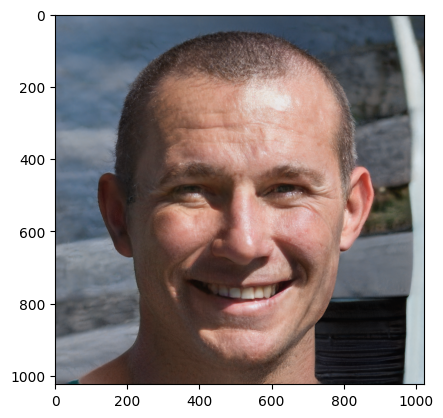

In [7]:
z = torch.randn([1, G.z_dim]).cuda()    # latent codes
c = None                                # class labels (not used in this example)
img = G(z, c)
g=torchvision.utils.make_grid(img,normalize=True)
plt.imshow(g.cpu().permute(1,2,0))
plt.show()

In [ ]:
torchvision.utils.save_image(g,"img.png")